## Reading the data


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import numpy as np
import pandas as pd

In [4]:
data = pd.read_csv('advertising.csv')
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [6]:
data.shape

(200, 4)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [8]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


## Visualising the data

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

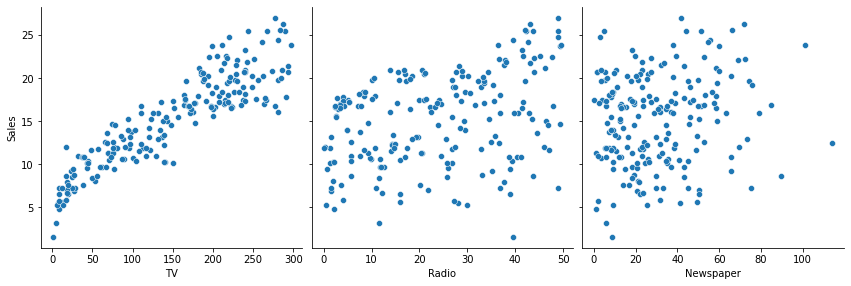

In [12]:
# pairplot of all the variables present to visualise which variables are most correlated to Sales.

sns.pairplot(data, x_vars = ['TV','Radio','Newspaper'], y_vars = 'Sales', size=4, aspect=1,kind='scatter')
plt.show()

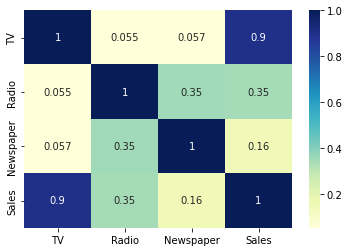

In [13]:
# heatmap

sns.heatmap(data.corr(),cmap = "YlGnBu",annot = True)
plt.show()

As is visible from the pairplot and the heatmap, the variable TV seems to be most correlated with Sales. So let's go ahead and perform simple linear regression using TV as our feature variable.

## Performing simple linear regression

Equation of linear regression<br>
$y = c + m_1x_1 + m_2x_2 + ... + m_nx_n$

-  $y$ is the response
-  $c$ is the intercept
-  $m_1$ is the coefficient for the first feature
-  $m_n$ is the coefficient for the nth feature<br>

In our case:

$y = c + m_1 \times TV$

The $m$ values are called the model **coefficients** or **model parameters**.


### Generic steps in model building using `statsmodels`

In [14]:
x = data['TV']
y = data['Sales']

####Train-Test split

In [15]:
from sklearn.model_selection import train_test_split

In [30]:
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size = 0.7, test_size = 0.3, random_state = 100)

In [31]:
x_train.head()

74     213.4
3      151.5
185    205.0
26     142.9
90     134.3
Name: TV, dtype: float64

In [32]:
y_train.head()

74     17.0
3      16.5
185    22.6
26     15.0
90     14.0
Name: Sales, dtype: float64

In [33]:
import statsmodels.api as sm

In [34]:
# Add a constant to get an intercept

x_train_sm = sm.add_constant(x_train)

# Fit the resgression line using 'OLS'
lr = sm.OLS(y_train, x_train_sm).fit()

In [35]:
# Print the parameters, i.e. the intercept and the slope of the regression line fitted
lr.params

const    6.948683
TV       0.054546
dtype: float64

In [36]:
# Performing a summary operation lists out all the different parameters of the regression line fitted
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Wed, 01 Feb 2023   Prob (F-statistic):           1.52e-52
Time:                        09:33:21   Log-Likelihood:                -321.12
No. Observations:                 140   AIC:                             646.2
Df Residuals:                     138   BIC:                             652.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9487      0.385     18.068      0.0

---
1. The coefficient for TV is 0.054, with a very low p value
The coefficient is statistically significant. So the association is not purely by chance.

2. R - squared is 0.816
Meaning that 81.6% of the variance in Sales is explained by TV. This is a decent R-squared value.

3. F statistic has a very low p value (practically low)
Meaning that the model fit is statistically significant, and the explained variance isn't purely by chance.

---
The fit is significant. Let's visualize how well the model fit the data.

From the parameters that we get, our linear regression equation becomes:

$ Sales = 6.948 + 0.054 \times TV $

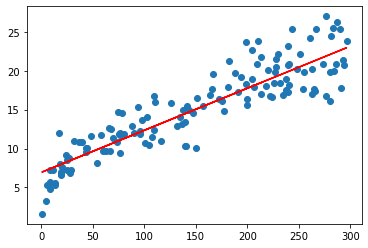

In [37]:
plt.scatter(x_train,y_train)
plt.plot(x_train,6.948+0.054*x_train,'r')
plt.show()

##Residual Analysis

#### distribution of error terms

In [38]:
y_train_pred = lr.predict(x_train_sm)
res = y_train - y_train_pred

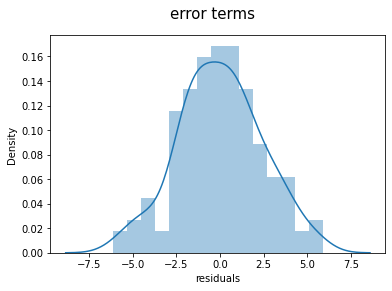

In [40]:
fig = plt.figure()
sns.distplot(res, bins = 15)
fig.suptitle('error terms',fontsize = 15)
plt.xlabel('residuals',fontsize = 10)
plt.show()

--- 
the residuals are normally distributed with mean = 0

## predictions on the test data

In [41]:
# Add a constant to x_test
x_test_sm = sm.add_constant(x_test)

# Predict the y values corresponding to x_test_sm
y_pred = lr.predict(x_test_sm)

In [42]:
y_pred.head()

126     7.374140
104    19.941482
99     14.323269
92     18.823294
111    20.132392
dtype: float64

In [43]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [44]:
# RMSE

np.sqrt(mean_squared_error(y_test,y_pred))


2.019296008966232

In [45]:
# r-squared

rsq = r2_score(y_test,y_pred)
rsq

0.792103160124566

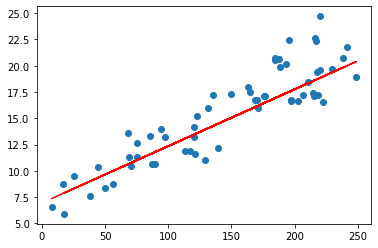

In [46]:
# visualising the fit on test data

plt.scatter(x_test, y_test)
plt.plot(x_test, 6.948 + 0.054 * x_test, 'r')
plt.show()

## Linear regression using `sklearn`

In [47]:
from sklearn.model_selection import train_test_split
x_train_lm, x_test_lm, y_train_lm, y_test_lm = train_test_split(x, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [48]:
x_train_lm.shape

(140,)

In [52]:
x_train_lm = x_train_lm.values.reshape(-1,1)
x_test_lm = x_test_lm.values.reshape(-1,1)

In [53]:
print(x_train_lm.shape)
print(y_train_lm.shape)
print(x_test_lm.shape)
print(y_test_lm.shape)

(140, 1)
(140,)
(60, 1)
(60,)


In [54]:
from sklearn.linear_model import LinearRegression

# Representing LinearRegression as lr(Creating LinearRegression Object)
lm = LinearRegression()

# Fit the model using lr.fit()
lm.fit(x_train_lm, y_train_lm)

LinearRegression()

In [55]:
print(lm.intercept_)
print(lm.coef_)

6.948683200001357
[0.05454575]
